In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,4)

In [69]:
df = pd.read_csv("./Balasore District Treasury.csv")

In [70]:
df.head()

,DDO Code,DDO Name,Budget Code,Allotment Serial No,Allotment Date,Allotment ID,Alloted Amount,Expenditure,Surrender/Withdrwal,Deduct Amount,Balance
0,BLSHOM002,Deputy Inspector General of Police(Eastern Ran...,01-2055-00-001-0534-02003-000-11-1-0,1,01-Mar-18,5548,3000,0,0,0,3000
1,BLSHOM008,Superintendent of Police Balasore,01-2055-00-109-0321-09001-000-11-1-0,1,01-Mar-18,5547,61868,0,0,0,61868
2,BLSHOM008,Superintendent of Police Balasore,01-2055-00-109-0321-01003-136-11-1-0,1,01-Mar-18,5546,9800000,5553483,0,0,4246517
3,BLSEDN003,"District Education Officer, Balasore",10-2202-02-101-1791-01003-156-11-1-0,1,28-Feb-18,5517,374012,0,0,0,374012
4,BLSEDN003,"District Education Officer, Balasore",10-2202-02-110-0976-41048-921-11-1-0,1,28-Feb-18,5505,28251814,0,0,0,28251814


In [71]:
df.columns

Index([u'DDO Code', u'DDO Name', u'Budget Code', u'Allotment Serial No',
       u'Allotment Date', u'Allotment ID', u'Alloted Amount', u'Expenditure',
       u'Surrender/Withdrwal', u'Deduct Amount', u'Balance'],
      dtype='object')

In [72]:
df["BudgetCode-MajorCode"] = df["Budget Code"].str.slice(0,2).astype(str)

In [73]:
df.head(2)

,DDO Code,DDO Name,Budget Code,Allotment Serial No,Allotment Date,Allotment ID,Alloted Amount,Expenditure,Surrender/Withdrwal,Deduct Amount,Balance,BudgetCode-MajorCode
0,BLSHOM002,Deputy Inspector General of Police(Eastern Ran...,01-2055-00-001-0534-02003-000-11-1-0,1,01-Mar-18,5548,3000,0,0,0,3000,01
1,BLSHOM008,Superintendent of Police Balasore,01-2055-00-109-0321-09001-000-11-1-0,1,01-Mar-18,5547,61868,0,0,0,61868,01


In [85]:
df_Major_code = df.groupby(["BudgetCode-MajorCode"])["Alloted Amount", "Expenditure"].sum()
df_Major_code.reset_index(level=0, inplace=True)
df_Major_code.sort_values("Alloted Amount", ascending=False, inplace=True)
df_Major_code.dtypes


BudgetCode-MajorCode    object
Alloted Amount           int64
Expenditure              int64
dtype: object

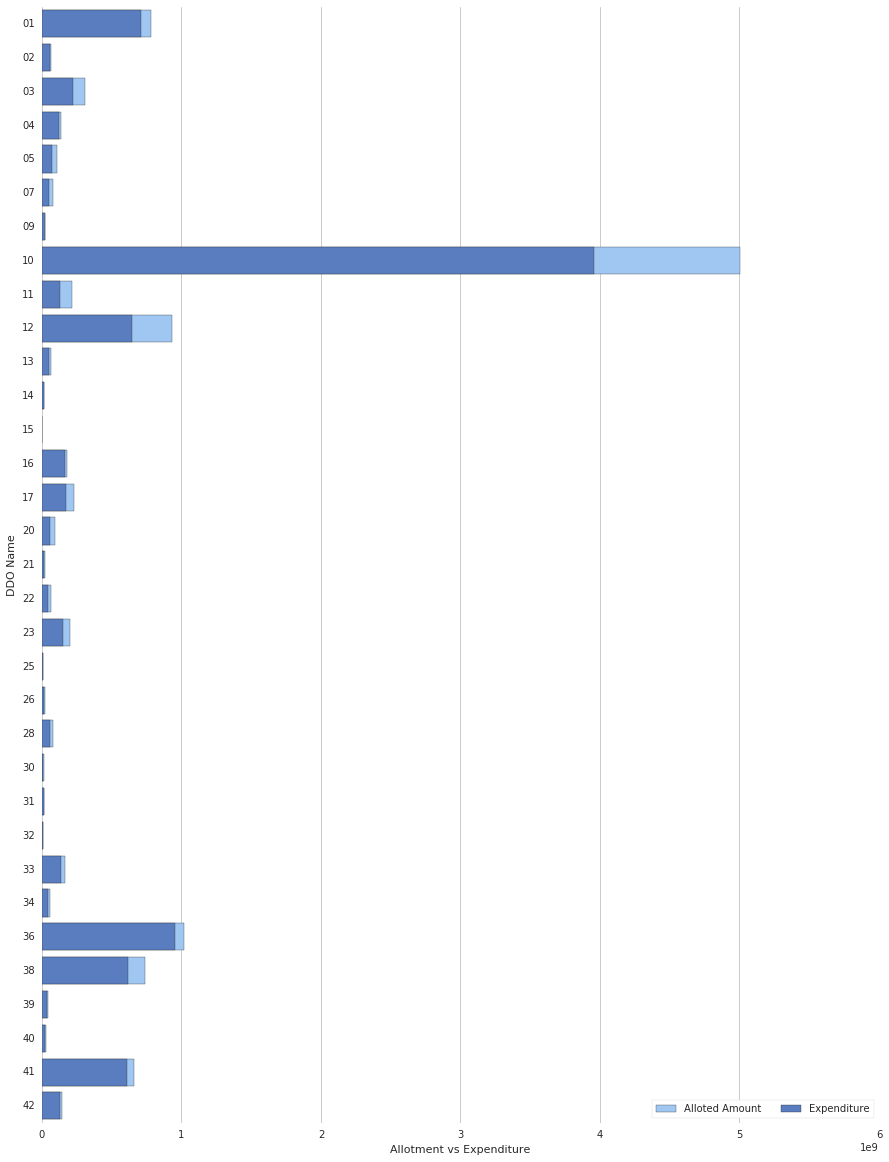

In [86]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 20))
sns.set(style="whitegrid")

sns.set_color_codes("pastel")
sns.barplot(x="Alloted Amount", y="BudgetCode-MajorCode", data=df_Major_code,
            label="Alloted Amount", color="b" , orient="h")

sns.set_color_codes("muted")
sns.barplot(x="Expenditure", y="BudgetCode-MajorCode", data=df_Major_code,
            label="Expenditure", color="b", orient="h")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="DDO Name",
       xlabel="Allotment vs Expenditure")
sns.despine(left=True, bottom=True)